In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Especifica la ruta completa del archivo CSV
ruta_archivo = 'caso_base/sdpf_volts_pu.csv'

# Lee el archivo CSV y carga los datos en un DataFrame
df = pd.read_csv(ruta_archivo)
df




,id,volt_A,deg_A,volt_B,deg_B,volt_C,deg_C
0,60,1.06250,0.00,1.05000,-120.00,1.06875,120.00
1,611,NaN,NaN,NaN,NaN,0.97392,115.78
2,632,1.02105,-2.49,1.04201,-121.72,1.01750,117.83
3,633,1.01802,-2.55,1.04012,-121.77,1.01488,117.83
4,634,0.99405,-3.23,1.02176,-122.22,0.99606,117.35
5,645,NaN,NaN,1.03284,-121.90,1.01552,117.86
6,646,NaN,NaN,1.03110,-121.98,1.01346,117.90
7,650,1.00000,0.00,1.00000,-120.00,1.00000,120.00
8,652,0.98252,-5.24,NaN,NaN,NaN,NaN
9,671,0.99003,-5.29,1.05292,-122.34,0.97793,116.03


([<matplotlib.axis.XTick at 0x7fa956424c10>,
 [Text(0, 0, '60'),
  Text(1, 0, '611'),
  Text(2, 0, '632'),
  Text(3, 0, '633'),
  Text(4, 0, '634'),
  Text(5, 0, '645'),
  Text(6, 0, '646'),
  Text(7, 0, '650'),
  Text(8, 0, '652'),
  Text(9, 0, '671'),
  Text(10, 0, '675'),
  Text(11, 0, '680'),
  Text(12, 0, '684'),
  Text(13, 0, '692')])

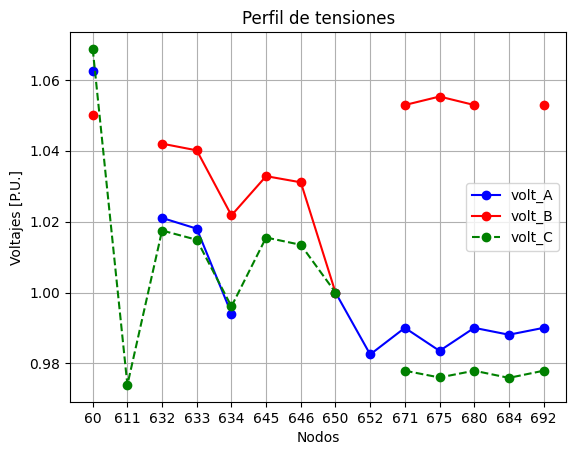

In [3]:
nuevo=np.arange(0,len(df["id"]),1)

plt.plot(nuevo,df["volt_A"],label='volt_A', color='blue', marker='o')
plt.plot(nuevo,df["volt_B"],label='volt_B', color='red', marker='o')
plt.plot(nuevo,df["volt_C"],label='volt_C', color='green',linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.xlabel("Nodos")
plt.ylabel("Voltajes [P.U.]")
plt.title("Perfil de tensiones")
plt.xticks(nuevo, df['id'])

In [4]:
# Especifica la ruta completa del archivo CSV
ruta_archivo = 'spot_loads.csv'

# Lee el archivo CSV y carga los datos en un DataFrame
dff = pd.read_csv(ruta_archivo)
dff 


,bus,conn,type,kw_ph1,kvar_ph1,kw_ph2,kvar_ph2,kw_ph3,kvar_ph3
0,634,Y,PQ,160,110,120,90,120,90
1,645,Y,PQ,0,0,170,125,0,0
2,646,D,Z,0,0,230,132,0,0
3,652,Y,Z,128,86,0,0,0,0
4,671,D,PQ,385,220,385,220,385,220
5,675,Y,PQ,485,190,68,60,290,212
6,692,D,I,0,0,0,0,170,151
7,611,Y,I,0,0,0,0,170,80


In [5]:
p1=dff["kw_ph1"]
p2=dff["kw_ph2"]
p3=dff["kw_ph3"]
pt=p1+p2+p3
pt*0.1


0     40.0
1     17.0
2     23.0
3     12.8
4    115.5
5     84.3
6     17.0
7     17.0
dtype: float64

In [10]:
# Especifica la ruta completa del archivo CSV
ruta_archivo = 'distributed_generation.csv'

# Lee el archivo CSV y carga los datos en un DataFrame
df_generation = pd.read_csv(ruta_archivo)

# Obtener los títulos de columnas del DataFrame existente
columnas_existente = df_generation.columns.tolist()

# Crear un nuevo DataFrame vacío con los mismos títulos de columnas
df_nuevo = pd.DataFrame(columns=columnas_existente)

df_nuevo["bus"]=dff["bus"]
configuracion= "Y"
modo="PQ"
potencia=pt*0.1 # Aquí se define el porcentaje de potencia
df_nuevo["conn"]=configuracion
df_nuevo["mode"]=modo
df_nuevo["kw_set"]=potencia
df_nuevo["kvar_set"]=0
df_nuevo


,bus,conn,mode,kw_set,kvar_set,kv_set,amp_set,kvar_min,kvar_max,xd
0,634,Y,PQ,40.0,0,NaN,NaN,NaN,NaN,NaN
1,645,Y,PQ,17.0,0,NaN,NaN,NaN,NaN,NaN
2,646,Y,PQ,23.0,0,NaN,NaN,NaN,NaN,NaN
3,652,Y,PQ,12.8,0,NaN,NaN,NaN,NaN,NaN
4,671,Y,PQ,115.5,0,NaN,NaN,NaN,NaN,NaN
5,675,Y,PQ,84.3,0,NaN,NaN,NaN,NaN,NaN
6,692,Y,PQ,17.0,0,NaN,NaN,NaN,NaN,NaN
7,611,Y,PQ,17.0,0,NaN,NaN,NaN,NaN,NaN


In [11]:
# Especifica la ruta completa del archivo CSV
ruta_archivo = 'caso_base/sdpf_volts_phase.csv'

# Lee el archivo CSV y carga los datos en un DataFrame
df = pd.read_csv(ruta_archivo)
df

# Guardar el DataFrame como un archivo CSV
df_nuevo.to_csv('nombre_del_archivo.csv', index=False)
# Ajuste y comparación de buses
valores_a_eliminar = df[~df["id"].isin(dff["bus"])]

# 2. Usar esos valores para filtrar df y eliminar las filas correspondientes
dfc = df[~df["id"].isin(valores_a_eliminar["id"])]
# Eliminar los indices antiguos para evitar problemas con la operación
dfc = dfc.reset_index(drop=True)

# Crear un diccionario que mapee los valores de bus a sus índices
indice_bus = {valor: indice for indice, valor in enumerate(dff["bus"])}

# Ordenar dfc según el mapeo de bus
dfc = dfc.iloc[dfc["id"].map(lambda x: indice_bus.get(x, float('inf'))).argsort()]

# Resetear los índices para evitar problemas
dfc = dfc.reset_index(drop=True)



dfc


,id,volt_A,deg_A,volt_B,deg_B,volt_C,deg_C
0,634,275.5,-3.23,283.2,-122.22,276.0,117.35
1,645,NaN,NaN,2480.7,-121.90,2439.1,117.86
2,646,NaN,NaN,2476.5,-121.98,2434.1,117.90
3,652,2359.8,-5.24,NaN,NaN,NaN,NaN
4,671,2377.8,-5.29,2528.9,-122.34,2348.8,116.03
5,675,2362.2,-5.54,2534.6,-122.52,2344.2,116.04
6,692,2377.8,-5.29,2528.9,-122.34,2348.8,116.03
7,611,NaN,NaN,NaN,NaN,2339.1,115.78


Revisar ahora con PI   S=V*i

In [12]:
ia=dff["kw_ph1"]/dfc["volt_A"]
ib=dff["kw_ph2"]/dfc["volt_B"]
ic=dff["kw_ph3"]/dfc["volt_C"]
# Reemplazar NaN por 0 en la variable ia
ia = ia.fillna(0)

# Reemplazar NaN por 0 en la variable ib
ib = ib.fillna(0)

# Reemplazar NaN por 0 en la variable ic
ic = ic.fillna(0)
Itotal=ia+ib+ic
Itotal


0    1.439274
1    0.068529
2    0.092873
3    0.054242
4    0.478068
5    0.355855
6    0.072377
7    0.072678
dtype: float64

In [19]:
df_nuevo["amp_set"]=Itotal*0.1
df_nuevo["mode"]="PI"
df_nuevo["kvar_set"]=np.nan
df_nuevo

,bus,conn,mode,kw_set,kvar_set,kv_set,amp_set,kvar_min,kvar_max,xd
0,634,Y,PI,40.0,NaN,NaN,0.143927,NaN,NaN,NaN
1,645,Y,PI,17.0,NaN,NaN,0.006853,NaN,NaN,NaN
2,646,Y,PI,23.0,NaN,NaN,0.009287,NaN,NaN,NaN
3,652,Y,PI,12.8,NaN,NaN,0.005424,NaN,NaN,NaN
4,671,Y,PI,115.5,NaN,NaN,0.047807,NaN,NaN,NaN
5,675,Y,PI,84.3,NaN,NaN,0.035586,NaN,NaN,NaN
6,692,Y,PI,17.0,NaN,NaN,0.007238,NaN,NaN,NaN
7,611,Y,PI,17.0,NaN,NaN,0.007268,NaN,NaN,NaN


In [20]:
# Guardar el DataFrame como un archivo CSV
df_nuevo.to_csv('nombre_del_archivo1.csv', index=False)

# index=False se utiliza para que no se incluya el índice del DataFrame en el archivo CSV

Graficas para PQ

([<matplotlib.axis.XTick at 0x275dd768860>,
 [Text(0, 0, '60'),
  Text(1, 0, '611'),
  Text(2, 0, '632'),
  Text(3, 0, '633'),
  Text(4, 0, '634'),
  Text(5, 0, '645'),
  Text(6, 0, '646'),
  Text(7, 0, '650'),
  Text(8, 0, '652'),
  Text(9, 0, '671'),
  Text(10, 0, '675'),
  Text(11, 0, '680'),
  Text(12, 0, '684'),
  Text(13, 0, '692')])

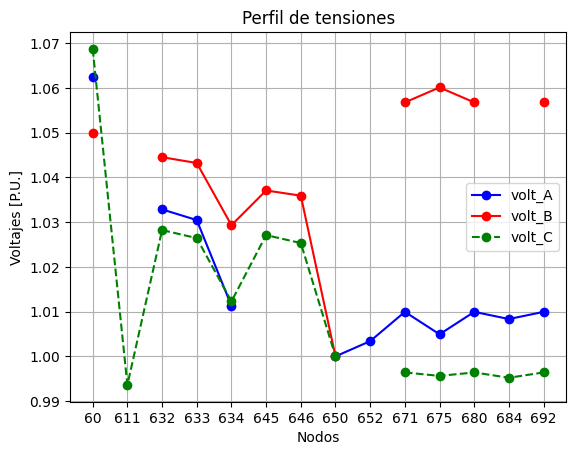

In [18]:
# Especifica la ruta completa del archivo CSV
ruta_archivo = 'caso_pq/sdpf_volts_pu50.csv'

# Lee el archivo CSV y carga los datos en un DataFrame
dfPQ = pd.read_csv(ruta_archivo)
dfPQ

nuevo=np.arange(0,len(dfPQ["id"]),1)

plt.plot(nuevo,dfPQ["volt_A"],label='volt_A', color='blue', marker='o')
plt.plot(nuevo,dfPQ["volt_B"],label='volt_B', color='red', marker='o')
plt.plot(nuevo,dfPQ["volt_C"],label='volt_C', color='green',linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.xlabel("Nodos")
plt.ylabel("Voltajes [P.U.]")
plt.title("Perfil de tensiones")
plt.xticks(nuevo, dfPQ['id'])

Graficas para PI

([<matplotlib.axis.XTick at 0x7fa954150220>,
 [Text(0, 0, '60'),
  Text(1, 0, '611'),
  Text(2, 0, '632'),
  Text(3, 0, '633'),
  Text(4, 0, '634'),
  Text(5, 0, '645'),
  Text(6, 0, '646'),
  Text(7, 0, '650'),
  Text(8, 0, '652'),
  Text(9, 0, '671'),
  Text(10, 0, '675'),
  Text(11, 0, '680'),
  Text(12, 0, '684'),
  Text(13, 0, '692')])

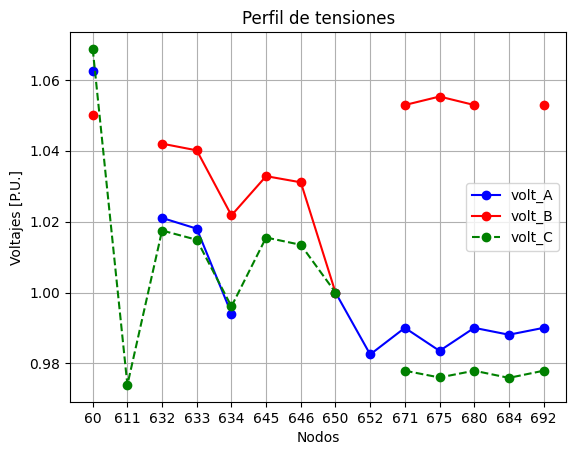

In [16]:
# Especifica la ruta completa del archivo CSV
ruta_archivo = 'caso_pi/sdpf_volts_pu10.csv'

# Lee el archivo CSV y carga los datos en un DataFrame
dfPQ = pd.read_csv(ruta_archivo)
dfPQ

nuevo=np.arange(0,len(dfPQ["id"]),1)

plt.plot(nuevo,dfPQ["volt_A"],label='volt_A', color='blue', marker='o')
plt.plot(nuevo,dfPQ["volt_B"],label='volt_B', color='red', marker='o')
plt.plot(nuevo,dfPQ["volt_C"],label='volt_C', color='green',linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.xlabel("Nodos")
plt.ylabel("Voltajes [P.U.]")
plt.title("Perfil de tensiones")
plt.xticks(nuevo, dfPQ['id'])

Pruebas

In [42]:

# Suponiendo que df y dff son tus dataframes
# Suponiendo que "id" es la columna clave en df y dff["bus"]

# 1. Fusionar df y dff en base a la columna "id" y "bus"
df = df.merge(dff, left_on="id", right_on="bus", how="inner")

# 2. Eliminar la columna "bus" si no es necesaria en el resultado final
df = df.drop(columns=["bus"])

# Ahora df se organiza en el mismo orden que dff según dff["bus"] en df["id"]
df


,id,volt_A,deg_A,volt_B,deg_B,volt_C,deg_C,conn_x,type_x,kw_ph1_x,...,kw_ph3_x,kvar_ph3_x,conn_y,type_y,kw_ph1_y,kvar_ph1_y,kw_ph2_y,kvar_ph2_y,kw_ph3_y,kvar_ph3_y
0,611,NaN,NaN,NaN,NaN,0.97392,115.78,Y,I,0,...,170,80,Y,I,0,0,0,0,170,80
1,634,0.99405,-3.23,1.02176,-122.22,0.99606,117.35,Y,PQ,160,...,120,90,Y,PQ,160,110,120,90,120,90
2,645,NaN,NaN,1.03284,-121.90,1.01552,117.86,Y,PQ,0,...,0,0,Y,PQ,0,0,170,125,0,0
3,646,NaN,NaN,1.03110,-121.98,1.01346,117.90,D,Z,0,...,0,0,D,Z,0,0,230,132,0,0
4,652,0.98252,-5.24,NaN,NaN,NaN,NaN,Y,Z,128,...,0,0,Y,Z,128,86,0,0,0,0
5,671,0.99003,-5.29,1.05292,-122.34,0.97793,116.03,D,PQ,385,...,385,220,D,PQ,385,220,385,220,385,220
6,675,0.98353,-5.54,1.05531,-122.52,0.97602,116.04,Y,PQ,485,...,290,212,Y,PQ,485,190,68,60,290,212
7,692,0.99003,-5.29,1.05292,-122.34,0.97793,116.03,D,I,0,...,170,151,D,I,0,0,0,0,170,151
